In [32]:
from typing_extensions import TypedDict
from typing import Literal
from langgraph.graph import StateGraph, START, END

# Define the state
class State(TypedDict):
    request: str
    cost: int
    status: str

# Define nodes
def submit_request(state: State) -> State:
    print(f"Submitting request: {state['request']} (cost: {state['cost']})")
    return {"request": state["request"], "cost": state["cost"], "status": "submitted"}

def review_request(state: State) -> State:
    print("Reviewing request...")
    return {"request": state["request"], "cost": state["cost"], "status": "under_review"}

def approve_request(state: State) -> State:
    print("Request approved")
    return {"request": state["request"], "cost": state["cost"], "status": "approved"}

def reject_request(state: State) -> State:
    print("Request rejected")
    return {"request": state["request"], "cost": state["cost"], "status": "rejected"}

# Conditional decision with multiple rules
def decide_request(state: State) -> Literal["approve", "reject"]:
    req = state["request"].lower()
    cost = state["cost"]

    if "office" in req and cost <= 500:
        return "approve"   # office-related and affordable
    if "training" in req and cost <= 1000:
        return "approve"   # training requests allowed up to 1000
    # everything else gets rejected
    return "reject"

# Build the graph
graph = StateGraph(State)

graph.add_node("submit", submit_request)
graph.add_node("review", review_request)
graph.add_node("approve", approve_request)
graph.add_node("reject", reject_request)

# Edges
graph.add_edge(START, "submit")
graph.add_edge("submit", "review")
graph.add_conditional_edges("review", decide_request)
graph.add_edge("approve", END)
graph.add_edge("reject", END)

# Compile
compiled_graph = graph.compile()

# Test with sample requests
sample_requests = [
    {"request": "Buy office supplies", "cost": 300, "status": ""},
    {"request": "Buy office chairs", "cost": 800, "status": ""},
    {"request": "Team training program", "cost": 900, "status": ""},
    {"request": "Company retreat", "cost": 5000, "status": ""},
]

for r in sample_requests:
    print("\nNew Run")
    result = compiled_graph.invoke(r)
    print("Final State:", result)
    print("-"*100)



New Run
Submitting request: Buy office supplies (cost: 300)
Reviewing request...
Request approved
Final State: {'request': 'Buy office supplies', 'cost': 300, 'status': 'approved'}
----------------------------------------------------------------------------------------------------

New Run
Submitting request: Buy office chairs (cost: 800)
Reviewing request...
Request rejected
Final State: {'request': 'Buy office chairs', 'cost': 800, 'status': 'rejected'}
----------------------------------------------------------------------------------------------------

New Run
Submitting request: Team training program (cost: 900)
Reviewing request...
Request approved
Final State: {'request': 'Team training program', 'cost': 900, 'status': 'approved'}
----------------------------------------------------------------------------------------------------

New Run
Submitting request: Company retreat (cost: 5000)
Reviewing request...
Request rejected
Final State: {'request': 'Company retreat', 'cost': 500

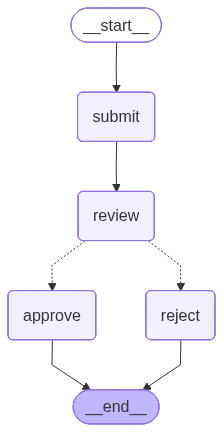

In [34]:
from IPython.display import Image, display

# Visualize the graph
display(Image(compiled_graph.get_graph().draw_mermaid_png()))